<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-06-15 21:18:42--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.001s  

2022-06-15 21:18:42 (18.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
#df.head()
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.9

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.4.26  |       h06a4308_0         132 KB  anaconda
    seaborn-0.11.2             |     pyhd3eb1b0_0         223 KB  anaconda
    ------------------------------------------------------------
                                           Total:         355 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  seaborn                                         pkgs/main --> anaconda



ca-certificates-2022 | 132 KB    | ##################################### | 100% 
seaborn-0.11.2       | 223 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: 

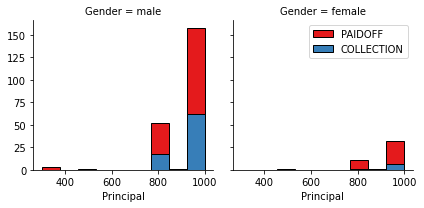

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

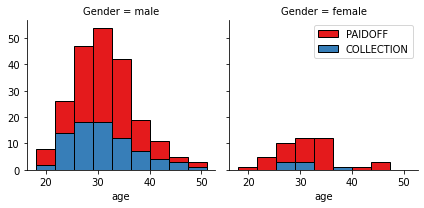

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


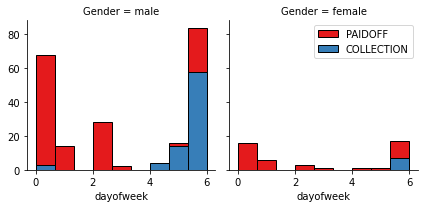

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [16]:
df['education'].value_counts()


High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


#The following is an attempt to get a better classification by modifing the preprocessing of the data set. Note that whatever preprocessing is used must be the same used for the final evaluation of final test data.

In [21]:
#This is an attempt to get a better classification by changing the preprocessing of the data set:
#Note whatever preprocessing is settled-on should be used for the final evaluation of final test data.

#But now treating the terms of the loans as categorical, rather than continuous since there are only 7-day, 15-day, or 30-day day loans.

#The following is done as an intermediate step to get rid of a warning from the preprocessing.StandardScaler related to types.
df['terms'].replace(to_replace=[7,15,30], value=["7-day","15-day","30-day"],inplace=True)

#Now redefining the features to use by one-hot encoding the loan terms:
Feature = df[['Principal','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

# Now one-hot encoding the three different loan terms:
Feature = pd.concat([Feature,pd.get_dummies(df['terms'])], axis=1)

y = df['loan_status'].values #Redundant step but repeated here for clarity.

X = Feature
print(Feature.head())
print(Feature.tail())

X = preprocessing.StandardScaler().fit(X).transform(X)

   Principal  age  Gender  weekend  Bechalor  High School or Below  college  \
0       1000   45       0        0         0                     1        0   
1       1000   33       1        0         1                     0        0   
2       1000   27       0        0         0                     0        1   
3       1000   28       1        1         0                     0        1   
4       1000   29       0        1         0                     0        1   

   15-day  30-day  7-day  
0       0       1      0  
1       0       1      0  
2       1       0      0  
3       0       1      0  
4       0       1      0  
     Principal  age  Gender  weekend  Bechalor  High School or Below  college  \
341        800   32       0        1         0                     1        0   
342       1000   25       0        1         0                     1        0   
343        800   39       0        0         0                     0        1   
344       1000   28       0        0   

# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


# See the above note on modified preprocessing of the data set.

In [22]:
#Importing the function for splitting the training data so that a best k can be found:
from sklearn.model_selection import train_test_split
#Splitting the training data so that a best k can be found:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


Train set: (276, 10) (276,)
Test set: (70, 10) (70,)


In [23]:
#Importing the needed functions to for KNN modeling:
#Importing the KNN classifier:
from sklearn.neighbors import KNeighborsClassifier
#Importing the function for computing the accuracy:
from sklearn import metrics


In [24]:
#Loop through several possible values for k to find the one with best accuracy:
#Note that we train on the training data and evaluate on the test data, 
#both of which were split form the original training set of data.
Ks = 10
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
  #Training the model and then prediciting:
  neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
  #Predicting with the trained model using the test data:
  yhat = neigh.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

In [25]:
mean_acc[0:10]

array([0.65714286, 0.61428571, 0.74285714, 0.7       , 0.75714286,
       0.71428571, 0.8       , 0.77142857, 0.74285714])

In [26]:
#Printing the best accuracy:
k_best = mean_acc.argmax()+1
print("The best accuracy was", mean_acc.max(), "with k=", k_best)

The best accuracy was 0.8 with k= 7


In [27]:
# Now prepare the best knn classifier using the best k value by training on the entire unsplit training set. 
# This model will be used later to report metrics on the final evaluation test which will be loaded below.
neigh_k_best = KNeighborsClassifier(n_neighbors=k_best).fit(X,y)
yhat_k_best = neigh_k_best.predict(X_test)

In [28]:
#Importing the functions to evaluate the the KNN classifier:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, jaccard_score

#Evaluating accuracy with several metrics in turn:
yhat_KNN_accuracy = metrics.accuracy_score(y_test, yhat_k_best)
yhat_KNN_F1 = f1_score(y_test, yhat_k_best, average='weighted')
yhat_KNN_jaccard = jaccard_score(y_test, yhat_k_best, average='weighted')
yhat_KNN_cnf_matrix = confusion_matrix(y_test, yhat_k_best)
yhat_KNN_report = classification_report(y_test, yhat_k_best)


print("KNN model accuracy using k =", k_best, ": ", yhat_KNN_accuracy, '\n')
print("KNN model weighted F1 score using k =", k_best, ": ", yhat_KNN_F1, '\n')
print("KNN model weighted Jaccard score using k =", k_best, ": ",yhat_KNN_jaccard, '\n')

#Following provides similar metrics:
print("Confusion matrix using KNN with k = ", k_best, ": \n", yhat_KNN_cnf_matrix, '\n')
print("Classification report using KNN with k = ", k_best, ": \n", yhat_KNN_report, '\n')

KNN model accuracy using k = 7 :  0.8142857142857143 

KNN model weighted F1 score using k = 7 :  0.7915804002760524 

KNN model weighted Jaccard score using k = 7 :  0.6880952380952381 

Confusion matrix using KNN with k =  7 : 
 [[ 5 10]
 [ 3 52]] 

Classification report using KNN with k =  7 : 
               precision    recall  f1-score   support

  COLLECTION       0.62      0.33      0.43        15
     PAIDOFF       0.84      0.95      0.89        55

    accuracy                           0.81        70
   macro avg       0.73      0.64      0.66        70
weighted avg       0.79      0.81      0.79        70
 



# Decision Tree


In [29]:
#Importing the needed functions to for Decision Tree modeling:
#Importing the Decision Tree classifier:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [30]:
#Setting up the Decision Tree classifer:
max_depth=6
loanTree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)

#Fitting the decision tree model to the same training set used for KNN above:
loanTree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [31]:
#Making predictions:
yhat_predTree = loanTree.predict(X_test)
print(yhat_predTree[0:5])
print(yhat_predTree[0:5])


['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [32]:
#Evaluating accuracy with several metrics in turn:
yhat_predTree_accuracy = metrics.accuracy_score(y_test, yhat_predTree)
yhat_predTree_F1 = f1_score(y_test, yhat_predTree, average='weighted')
yhat_predTree_jaccard = jaccard_score(y_test, yhat_predTree, average='weighted')

yhat_predTree_cnf_matrix = confusion_matrix(y_test, yhat_predTree)
yhat_predTree_report = classification_report(y_test, yhat_predTree)


print("Decision Tree model accuracy using max_depth", max_depth, ": ", yhat_predTree_accuracy, '\n')
print("Decision Tree weighted F1 score using  max_depth", max_depth, ": ", yhat_predTree_F1, '\n')
print("Decision Tree weighted Jaccard score using max_depth", max_depth, ": ", yhat_predTree_jaccard, '\n')

#Following provides similar metrics:
print("Confusion matrix using KNN with max_depth", max_depth, ": \n", yhat_predTree_cnf_matrix, '\n')
print("Classification report using KNN with max_depth", max_depth, ": \n", yhat_predTree_report, '\n')

Decision Tree model accuracy using max_depth 6 :  0.7714285714285715 

Decision Tree weighted F1 score using  max_depth 6 :  0.7064793130366899 

Decision Tree weighted Jaccard score using max_depth 6 :  0.6161247107538668 

Confusion matrix using KNN with max_depth 6 : 
 [[ 1 14]
 [ 2 53]] 

Classification report using KNN with max_depth 6 : 
               precision    recall  f1-score   support

  COLLECTION       0.33      0.07      0.11        15
     PAIDOFF       0.79      0.96      0.87        55

    accuracy                           0.77        70
   macro avg       0.56      0.52      0.49        70
weighted avg       0.69      0.77      0.71        70
 



<function matplotlib.pyplot.show(close=None, block=None)>

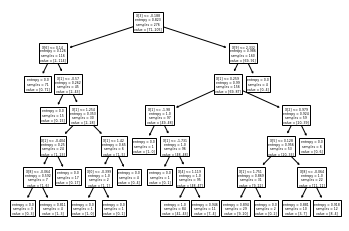

In [33]:
import matplotlib.pyplot as plt
tree.plot_tree(loanTree)
plt.show


# Support Vector Machine


In [34]:
#Importing the needed functions for SVM modeling:
#Importing the SVM classifier:
from sklearn import svm

In [35]:
#Setting up SVM model with several kernels to see which works best:
svm_rbf = svm.SVC(kernel='rbf')
svm_sigmoid = svm.SVC(kernel='sigmoid')
svm_poly = svm.SVC(kernel='poly')

#Training the SVM models
svm_rbf.fit(X_train, y_train)
svm_sigmoid.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [36]:
#Making predictions using each of the SVM classifiers for comparison:
yhat_rbf = svm_rbf.predict(X_test)
yhat_sigmoid = svm_sigmoid.predict(X_test)
yhat_poly = svm_poly.predict(X_test)

In [37]:
#Importing the functions to evaluate the best SVM kernel
from sklearn.metrics import classification_report, confusion_matrix, f1_score, jaccard_score

In [38]:
#Evaluating each SVM model based on different kernels in turn:
#First the rbf kernel:
yhat_rbf_accuracy = metrics.accuracy_score(y_test, yhat_rbf)

yhat_rbf_F1 = f1_score(y_test, yhat_rbf, average='weighted')
yhat_rbf_jaccard = jaccard_score(y_test, yhat_rbf, average='weighted')

yhat_rbf_cnf_matrix = confusion_matrix(y_test,yhat_rbf)
yhat_rbf_report = classification_report(y_test, yhat_rbf)

print("SVM model accuracy using rbf kernel: ", yhat_rbf_accuracy, '\n')
print("SVM model weighted F1 score using rbf kernel: ", yhat_rbf_F1, '\n')
print("SVM model weighted Jaccard score using rbf kernel: ", yhat_rbf_jaccard, '\n')

#Following provides similar metrics:
print("Confusion matrix using rbf kernel: \n", yhat_rbf_cnf_matrix, '\n')
print("Classification report using rbf kernel: \n", yhat_rbf_report, '\n')



SVM model accuracy using rbf kernel:  0.7428571428571429 

SVM model weighted F1 score using rbf kernel:  0.7275882012724117 

SVM model weighted Jaccard score using rbf kernel:  0.6103896103896104 

Confusion matrix using rbf kernel: 
 [[ 4 11]
 [ 7 48]] 

Classification report using rbf kernel: 
               precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70
 



In [39]:
#Evaluating each SVM model based on different kernels in turn:
#Next the sigmoid kernel:
yhat_sigmoid_accuracy = metrics.accuracy_score(y_test, yhat_sigmoid)
yhat_sigmoid_F1 = f1_score(y_test, yhat_sigmoid, average='weighted')
yhat_sigmoid_jaccard = jaccard_score(y_test, yhat_sigmoid, average='weighted')
yhat_sigmoid_cnf_matrix = confusion_matrix(y_test,yhat_sigmoid)
yhat_sigmoid_report = classification_report(y_test, yhat_sigmoid)

print("SVM model accuracy using sigmoid kernel: ", yhat_sigmoid_accuracy, '\n')
print("SVM model weighted F1 score using sigmoid kernel: ", yhat_sigmoid_F1, '\n')
print("SVM model weighted Jaccard score using sigmoid kernel: ", yhat_sigmoid_jaccard, '\n')

#Following provides similar metrics:
print("Confusion matrix using sigmoid kernel: \n", yhat_sigmoid_cnf_matrix, '\n')
print("Classification report using sigmoidf kernel: \n", yhat_sigmoid_report, '\n')

SVM model accuracy using sigmoid kernel:  0.7428571428571429 

SVM model weighted F1 score using sigmoid kernel:  0.7048206031256878 

SVM model weighted Jaccard score using sigmoid kernel:  0.5991596638655463 

Confusion matrix using sigmoid kernel: 
 [[ 2 13]
 [ 5 50]] 

Classification report using sigmoidf kernel: 
               precision    recall  f1-score   support

  COLLECTION       0.29      0.13      0.18        15
     PAIDOFF       0.79      0.91      0.85        55

    accuracy                           0.74        70
   macro avg       0.54      0.52      0.51        70
weighted avg       0.68      0.74      0.70        70
 



In [40]:
#Evaluating each SVM model based on different kernels in turn:
#Last the poly kernel:
yhat_poly_accuracy = metrics.accuracy_score(y_test, yhat_poly)
yhat_poly_F1 = f1_score(y_test, yhat_poly, average='weighted')
yhat_poly_jaccard = jaccard_score(y_test, yhat_poly, average='weighted')
yhat_poly_cnf_matrix = confusion_matrix(y_test,yhat_poly)
yhat_poly_report = classification_report(y_test, yhat_poly)

print("SVM model accuracy using poly kernel: ", yhat_poly_accuracy, '\n')
print("SVM model weighted F1 score using poly kernel: ", yhat_poly_F1, '\n')
print("SVM model weighted Jaccard score using poly kernel: ", yhat_poly_jaccard, '\n')

#Following provides similar metrics:
print("Confusion matrix using poly kernel: \n", yhat_poly_cnf_matrix, '\n')
print("Classification report using poly kernel: \n", yhat_poly_report, '\n')

SVM model accuracy using poly kernel:  0.7571428571428571 

SVM model weighted F1 score using poly kernel:  0.6771196283391405 

SVM model weighted Jaccard score using poly kernel:  0.5948979591836734 

Confusion matrix using poly kernel: 
 [[ 0 15]
 [ 2 53]] 

Classification report using poly kernel: 
               precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        15
     PAIDOFF       0.78      0.96      0.86        55

    accuracy                           0.76        70
   macro avg       0.39      0.48      0.43        70
weighted avg       0.61      0.76      0.68        70
 



# Logistic Regression


In [41]:
#Importing the needed function for Logistic Regresion modeling
from sklearn.linear_model import LogisticRegression

In [42]:
#Fit Logistic Regreesion model using train data:
#LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR = LogisticRegression(C=0.5, solver='saga').fit(X_train, y_train)

In [43]:
#Predict Logistic Regression classification using test data:
yhat_lr = LR.predict(X_test)


In [44]:
# Examine the first 5 probability estimates, and then the last 5 probability estimates:
yhat_lr_prob = LR.predict_proba(X_test)

print( "   P(Y=0|X)    P(Y=1|X)")
print('First 5')
print(yhat_lr_prob[0:5])
print('Last 5')
print(yhat_lr_prob[-5:])

   P(Y=0|X)    P(Y=1|X)
First 5
[[0.50248432 0.49751568]
 [0.42369368 0.57630632]
 [0.03104434 0.96895566]
 [0.04236384 0.95763616]
 [0.02805027 0.97194973]]
Last 5
[[0.43020253 0.56979747]
 [0.03449825 0.96550175]
 [0.21172741 0.78827259]
 [0.33423755 0.66576245]
 [0.03423175 0.96576825]]


In [45]:
#Computing log_loss
from sklearn.metrics import log_loss
yhat_log_loss = log_loss(y_test, yhat_lr_prob)
print("Log loss: ", log_loss(y_test, yhat_lr_prob), '\n')

Log loss:  0.4812095783741066 



In [46]:
#Evaluating the Logistic Regression model based with several metrics:
yhat_lr_accuracy = metrics.accuracy_score(y_test, yhat_lr)
yhat_lr_F1 = f1_score(y_test, yhat_lr, average='weighted')
yhat_lr_jaccard = jaccard_score(y_test, yhat_lr, average='weighted')
print("Logistic Regression accuracy: ", yhat_lr_accuracy, '\n')
print("Logistic Regression model weighted F1 score: ", yhat_lr_F1, '\n')
print("Logistic Regression model weighted Jaccard score: ", yhat_lr_jaccard, '\n')

yhat_lr_cnf_matrix = confusion_matrix(y_test,yhat_lr)
yhat_lr_report = classification_report(y_test, yhat_lr)

#Following provides similar metrics:
print("Confusion matrix using Logistic Regression: \n", yhat_lr_cnf_matrix, '\n')
print("Classification report using Logistic Regression: \n", yhat_lr_report, '\n')

Logistic Regression accuracy:  0.7428571428571429 

Logistic Regression model weighted F1 score:  0.7048206031256878 

Logistic Regression model weighted Jaccard score:  0.5991596638655463 

Confusion matrix using Logistic Regression: 
 [[ 2 13]
 [ 5 50]] 

Classification report using Logistic Regression: 
               precision    recall  f1-score   support

  COLLECTION       0.29      0.13      0.18        15
     PAIDOFF       0.79      0.91      0.85        55

    accuracy                           0.74        70
   macro avg       0.54      0.52      0.51        70
weighted avg       0.68      0.74      0.70        70
 



# Model Evaluation using Test set


In [47]:
# #These were already imported above for evaluating the various classifers
# from sklearn.metrics import jaccard_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import log_loss


First, download and load the test set:


In [48]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-06-15 21:20:40--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-06-15 21:20:40 (88.8 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [49]:
test_df = pd.read_csv('loan_test.csv')

## Perform the several preprocessing and feature extraction steps needed to match the preprocessing and feature extraction used to fit the models

In [50]:
#Convert to date time object as performed on the original data
test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(df['effective_date'])

In [51]:
#Add column "weekend" using day of week processing as performed on the original data
test_df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [52]:
#Encode "Gender" as male = 0 and female = 1 as performed on the original data.
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

### The following is my own modification to the preprocessing of the Feature set where the terms of the loan, originally represented by numbers (7.0, 15.0, 30.0) are treated as categorical data, and then afterwards one-hot encoded.

In [53]:
# In my own modified preprocessing the loan term data is treated as categorical data.
test_df['terms'].replace(to_replace=[7.0, 15.0, 30.0], value=['7-day','15-day','30-day'],inplace=True)

In [54]:
#Start putting together the new test_Feature data set as performed on the original data.
test_Feature = test_df[['Principal','age','Gender','weekend']]
#test_Feature = test_df[['Principal','terms','age','Gender','weekend']] #to switch preprocessing for test

In [55]:
#One-hot encode the levels of education completed.
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)

### In the modified preprocessing the terms of loan are one-hot encoded.

In [56]:
# Now one-hot encoding the three different loan terms:
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['terms'])], axis=1)
print("test_Feature head: \n", test_Feature.head(),'\n')
print("test _Feature tail: \n", test_Feature.tail(),'\n')

test_Feature head: 
    Principal  age  Gender  weekend  Bechalor  High School or Below  college  \
0       1000   50       1        0         1                     0        0   
1        300   35       0        0         0                     0        0   
2       1000   43       1        0         0                     1        0   
3       1000   26       0        1         0                     0        1   
4        800   29       0        1         1                     0        0   

   15-day  30-day  7-day  
0       0       1      0  
1       0       0      1  
2       0       1      0  
3       0       1      0  
4       1       0      0   

test _Feature tail: 
     Principal  age  Gender  weekend  Bechalor  High School or Below  college  \
49       1000   32       0        1         0                     1        0   
50        800   29       0        1         0                     0        1   
51       1000   37       0        1         0                     1        0  

## It is very important that the preprocessing steps used for training and tuning be the same preprocessing step used to prepare the final test data for the prediction.

In [57]:
#Setting up the labels
y_final = test_df['loan_status'].values
#print(y_final)

#Converting the test Feature data frame to a numpy array to be ready to gather metrics for the
# best classifiers that have already been fitted.
X_final = test_Feature
X_final = preprocessing.StandardScaler().fit(X_final).transform(X_final)
# X_final #Uncomment to examine the numpy array

### There is no need to split the data now since the classifers have already been trained.

# Using the final test data to evaluate metrics for the best KNN classifer.

In [58]:
#Making predictions using the best KNN classifer:
final_yhat_k_best = neigh_k_best.predict(X_final)

#Evaluating accuracy with several metrics in turn:
#final_yhat_KNN_accuracy = metrics.accuracy_score(y_test, final_yhat_k_best)
final_yhat_KNN_F1 = f1_score(y_final, final_yhat_k_best, average='weighted')
final_yhat_KNN_jaccard = jaccard_score(y_final, final_yhat_k_best, average='weighted')
#final_yhat_KNN_cnf_matrix = confusion_matrix(y_final, final_yhat_k_best)
#final_yhat_KNN_report = classification_report(y_final, final_yhat_k_best)

#print("KNN model accuracy using k =", k_best, ": ", final_yhat_KNN_accuracy, '\n')
print("KNN model weighted F1 score using k =", k_best, ": ", final_yhat_KNN_F1, '\n')
print("KNN model weighted Jaccard score using k =", k_best, ": ", final_yhat_KNN_jaccard, '\n')

# #Following provides similar metrics:
# print("Confusion matrix using KNN with k = ", k_best, ": \n", final_yhat_KNN_cnf_matrix, '\n')
# print("Classification report using KNN with k = ", k_best, ": \n", final_yhat_KNN_report, '\n')

KNN model weighted F1 score using k = 7 :  0.6328400281888654 

KNN model weighted Jaccard score using k = 7 :  0.5102564102564102 



# Using the final test data to evaluate metrics for the best Decision Tree classifier.

In [59]:
#Making predictions using the best Decision Tree classifier:
final_yhat_predTree = loanTree.predict(X_final)

#Evaluating accuracy with several metrics in turn:
#final_yhat_predTree_accuracy = metrics.accuracy_score(y_final, final_yhat_predTree)
final_yhat_predTree_F1 = f1_score(y_final, final_yhat_predTree, average='weighted')
final_yhat_predTree_jaccard = jaccard_score(y_final, final_yhat_predTree, average='weighted')
#final_yhat_predTree_cnf_matrix = confusion_matrix(y_final, final_yhat_predTree)
#final_yhat_predTree_report = classification_report(y_final, final_yhat_predTree)


#print("Decision Tree model accuracy using max_depth", max_depth, ": ", final_yhat_predTree_accuracy, '\n')
print("Decision Tree weighted F1 score using  max_depth", max_depth, ": ", final_yhat_predTree_F1, '\n')
print("Decision Tree weighted Jaccard score using max_depth", max_depth, ": ", final_yhat_predTree_jaccard, '\n')

# #Following provides similar metrics:
# print("Confusion matrix using KNN with max_depth", max_depth, ": \n", final_yhat_predTree_cnf_matrix, '\n')
# print("Classification report using KNN with max_depth", max_depth, ": \n", final_yhat_predTree_report, '\n')

Decision Tree weighted F1 score using  max_depth 6 :  0.6453810131971051 

Decision Tree weighted Jaccard score using max_depth 6 :  0.5258659469185786 



#Using the final test data to evaluate metrics for the best SVM classifier.

In [60]:
#Making predictions using the best SVM classifier:
final_yhat_rbf = svm_rbf.predict(X_final)

#Evaluating each SVM model based on different kernels in turn:
#Using the rbf kernel:
#final_yhat_rbf_accuracy = metrics.accuracy_score(y_final, final_yhat_rbf)
final_yhat_rbf_F1 = f1_score(y_final, final_yhat_rbf, average='weighted')
final_yhat_rbf_jaccard = jaccard_score(y_final, final_yhat_rbf, average='weighted')
#final_yhat_rbf_cnf_matrix = confusion_matrix(y_final,final_yhat_rbf)
#final_yhat_rbf_report = classification_report(y_final, final_yhat_rbf)

#print("SVM model accuracy using rbf kernel: ", final_yhat_rbf_accuracy, '\n')
print("SVM model weighted F1 score using rbf kernel: ", final_yhat_rbf_F1, '\n')
print("SVM model weighted Jaccard score using rbf kernel: ", final_yhat_rbf_jaccard, '\n')

# #Following provides similar metrics:
# print("Confusion matrix using rbf kernel: \n", final_yhat_rbf_cnf_matrix, '\n')
# print("Classification report using rbf kernel: \n", final_yhat_rbf_report, '\n')

SVM model weighted F1 score using rbf kernel:  0.7705406555981269 

SVM model weighted Jaccard score using rbf kernel:  0.6554705215419501 



## Using the final test data to evaluate metrics for the Logistic Regression classifer.

In [61]:
#Predict Logistic Regression classification using test data:
final_yhat_lr = LR.predict(X_final)

#Evaluating the Logistic Regression model based with several metrics:
#final_yhat_lr_accuracy = metrics.accuracy_score(y_final, final_yhat_lr)
final_yhat_lr_F1 = f1_score(y_final, final_yhat_lr, average='weighted')
final_yhat_lr_jaccard = jaccard_score(y_final, final_yhat_lr, average='weighted')
#print("Logistic Regression accuracy: ", final_yhat_lr_accuracy, '\n')
print("Logistic Regression model weighted F1 score: ", final_yhat_lr_F1, '\n')
print("Logistic Regression model weighted Jaccard score: ", final_yhat_lr_jaccard, '\n')

#final_yhat_lr_cnf_matrix = confusion_matrix(y_final, final_yhat_lr)
#final_yhat_lr_report = classification_report(y_final, final_yhat_lr)

# #Following provides similar metrics:
# print("Confusion matrix using Logistic Regression: \n", final_yhat_lr_cnf_matrix, '\n')
# print("Classification report using Logistic Regression: \n", final_yhat_lr_report, '\n')

#Computing the probabilities and then the log loss:
final_yhat_lr_prob = LR.predict_proba(X_final)
final_yhat_log_loss = log_loss(y_test, yhat_lr_prob)
print("Logistic Regression model log loss: ", log_loss(y_final, final_yhat_lr_prob), '\n')

Logistic Regression model weighted F1 score:  0.6304176516942475 

Logistic Regression model weighted Jaccard score:  0.5486968449931412 

Logistic Regression model log loss:  0.5269974408129394 



# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


These metrics result when the loan terms are converted to categorical labels and then one-hot encoded which was my modified preprocessing attempt. (Used comments to switch back to the other preprocessing to get the other report below.)

| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN (k=7)               | 0.510       | 0.633        | NA      |
| Decision Tree      | 0.526       | 0.645        | NA      |
| SVM                | 0.655       | 0.771        | NA      |
| LogisticRegression | 0.549      |  0.630        | 0.527       |


This metrics result when the loan terms are left as numerical 7.0, 15.0, 30.0. (Used comments to redo my preprocessing modification to get back to the other report above.)

| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN (k=7)               | 0.495       | 0.620        | NA      |
| Decision Tree      | 0.526       | 0.645        | NA      |
| SVM                | 0.676       | 0.786        | NA      |
| LogisticRegression | 0.549      |  0.630        | 0.547       |

###My conclusion is that the modified preprocessing did not make much of a difference, but worth a try.


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
